In [1]:
import pandas as pd
import numpy as np

In [2]:
advert=pd.read_csv('advertising.csv')

In [3]:
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
Daily Time Spent on Site    900 non-null float64
Age                         900 non-null int64
Area Income                 900 non-null float64
Daily Internet Usage        900 non-null float64
Ad Topic Line               900 non-null object
City                        900 non-null object
Male                        900 non-null int64
Country                     900 non-null object
Timestamp                   900 non-null object
Clicked on Ad               900 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,65.425800,35.903333,55315.072767,180.702344,0.483333,0.487778
std,15.712563,8.744462,13376.323458,43.823397,0.500000,0.500129
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,52.160000,29.000000,47494.787500,139.245000,0.000000,0.000000
50%,68.945000,35.000000,57631.345000,184.555000,0.000000,0.000000
75%,78.610000,41.000000,65666.300000,219.720000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


In [6]:
advert.describe(include=[np.object])

,Ad Topic Line,City,Country,Timestamp
count,900,900,900,900
unique,900,875,234,897
top,Digitized zero-defect implementation,Lisamouth,Turkey,30/05/2016 8:02
freq,1,3,8,2


In [7]:
print(advert.isnull().any())

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool


In [8]:
advert.rename(columns={'Male':'Gender'}, inplace=True)

In [9]:
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [10]:
import matplotlib.pyplot as plt

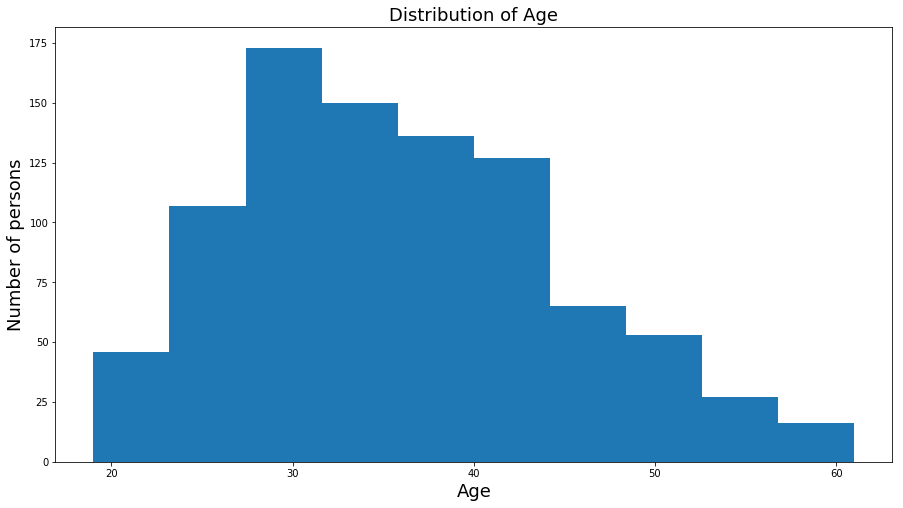

In [11]:
plt.figure(figsize=(15, 8))
plt.hist(advert.Age)
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title("Distribution of Age", fontdict=font)
plt.savefig('Age-Distribution.png')
plt.show()

In [12]:
age_data = pd.cut(advert.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [13]:
print(age_data.value_counts().sort_index(ascending=True))

(0, 10]       0
(10, 20]     10
(20, 30]    264
(30, 40]    372
(40, 50]    190
(50, 60]     63
(60, 70]      1
(70, 80]      0
Name: Age, dtype: int64


In [14]:
import seaborn as sns

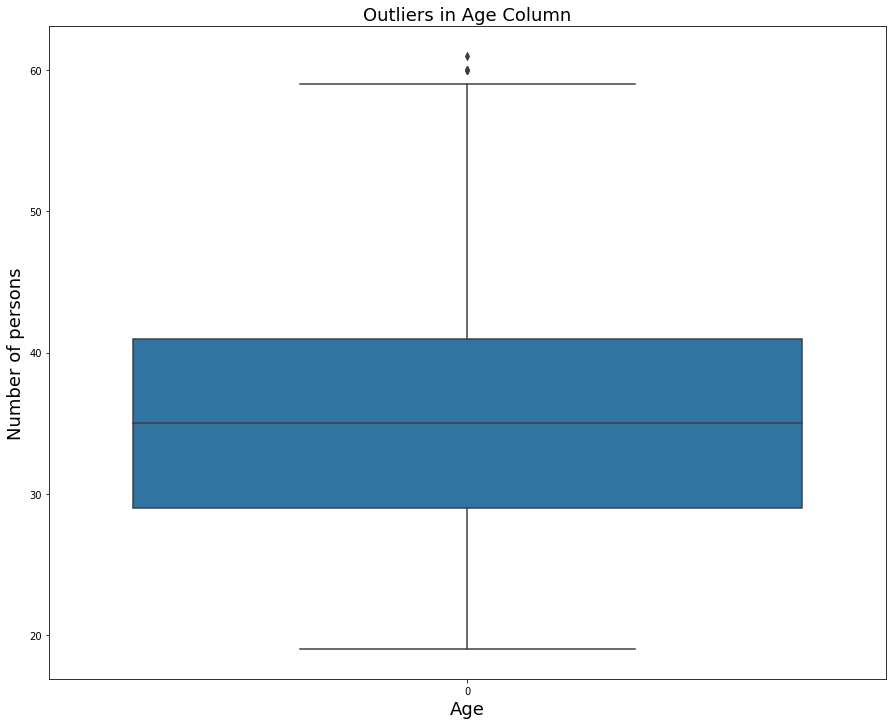

In [15]:
fig, ax = plt.subplots(figsize=(15, 12))
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
sns.boxplot(data=advert.Age, ax=ax)
plt.title('Outliers in Age Column', fontdict=font)
plt.savefig('Age-Outliers.png')
plt.show()

In [16]:
advert.Gender.value_counts()

0    465
1    435
Name: Gender, dtype: int64

In [17]:
total_number_of_persons  = advert.Gender.count()

percentage_female_ads = (advert['Gender'][advert['Gender']==0].count()/total_number_of_persons) * 100
print('Total female are ', percentage_female_ads)

percentage_male_ads = (advert['Gender'][advert['Gender']==1].count()/total_number_of_persons) * 100
print('Total male are ', percentage_male_ads)

Total female are  51.66666666666667
Total male are  48.333333333333336


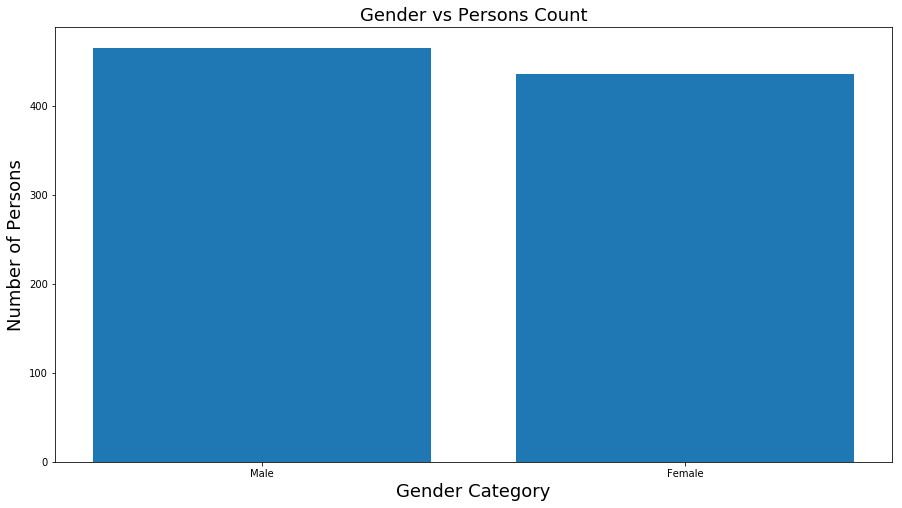

In [18]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender Category', fontdict=font)
plt.ylabel('Number of Persons', fontdict=font)
plt.bar(x=['Male', 'Female'], height=advert['Gender'].value_counts())
plt.title('Gender vs Persons Count', fontdict=font)
plt.savefig('Gender-Distribution')
plt.show()

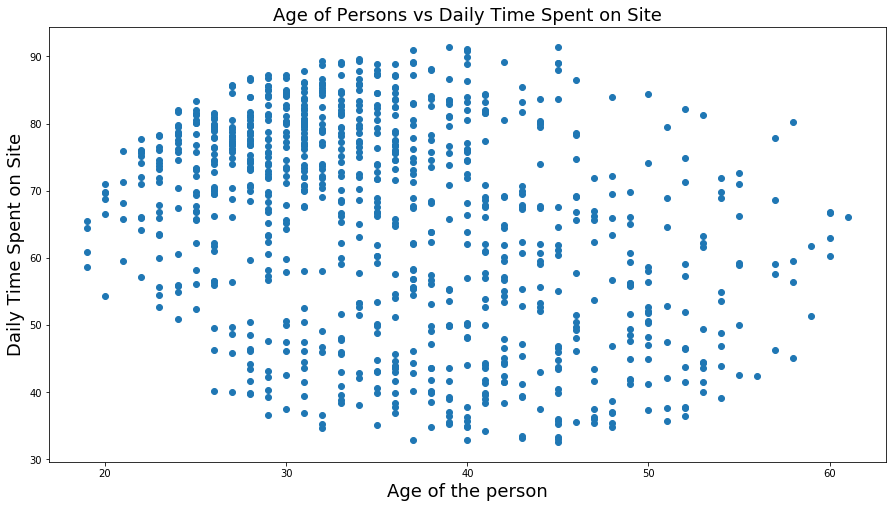

In [19]:
plt.figure(figsize=(15, 8))
plt.xlabel('Age of the person', fontdict=font)
plt.ylabel('Daily Time Spent on Site', fontdict=font)
plt.scatter(x=advert['Age'], y=advert['Daily Time Spent on Site'])
plt.title('Age of Persons vs Daily Time Spent on Site', fontdict=font)
plt.savefig('Daily Time Spent on Site-Age-Analysis')
plt.show()

In [20]:
advert['Age'].corr(advert['Daily Time Spent on Site'])

-0.33730595442129757

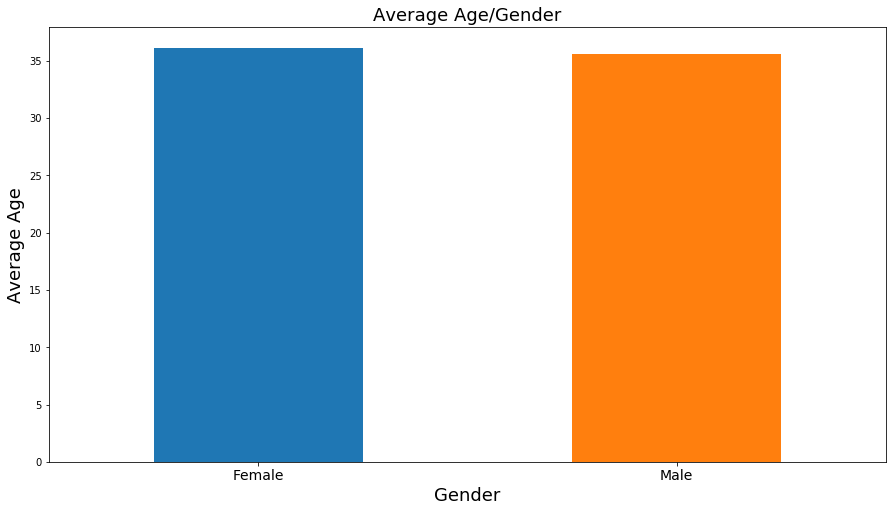

In [21]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender', fontdict=font)
plt.ylabel('Average Age', fontdict=font)
advert.groupby('Gender')['Age'].mean().plot.bar()
plt.xticks(labels=['Female', 'Male'], ticks=[0, 1], rotation=0, fontsize=14)
plt.title('Average Age/Gender', fontdict=font)
plt.savefig('Age-Gender-Analysis.png')
plt.show()

In [22]:
pd.crosstab(advert['Gender'], advert['Clicked on Ad'])

Clicked on Ad,0,1
Gender,,
0,229,236
1,232,203


In [23]:
male_data_noclick = advert['Gender'][(advert['Gender']==1) & (advert['Clicked on Ad']==0)].shape[0]
male_data_noclick

232

In [24]:
male_data_click = advert['Gender'][(advert['Gender']==1) & (advert['Clicked on Ad']==1)].shape[0]
male_data_click

203

In [25]:
female_data_click = advert['Gender'][(advert['Gender']==0) & (advert['Clicked on Ad']==0)].shape[0]
female_data_click

229

In [26]:
female_data_noclick = advert['Gender'][(advert['Gender']==0) & (advert['Clicked on Ad']==0)].shape[0]
female_data_noclick

229

In [27]:
gender_onclick_data = pd.DataFrame()

In [28]:
gender_onclick_data['Not_Click_AD'] = [male_data_noclick, female_data_noclick]

In [29]:
gender_onclick_data

,Not_Click_AD
0,232
1,229


In [30]:
gender_onclick_data['Click_AD'] = [male_data_click, female_data_click]

In [31]:
gender_onclick_data

,Not_Click_AD,Click_AD
0,232,203
1,229,229


In [32]:
import seaborn as sns

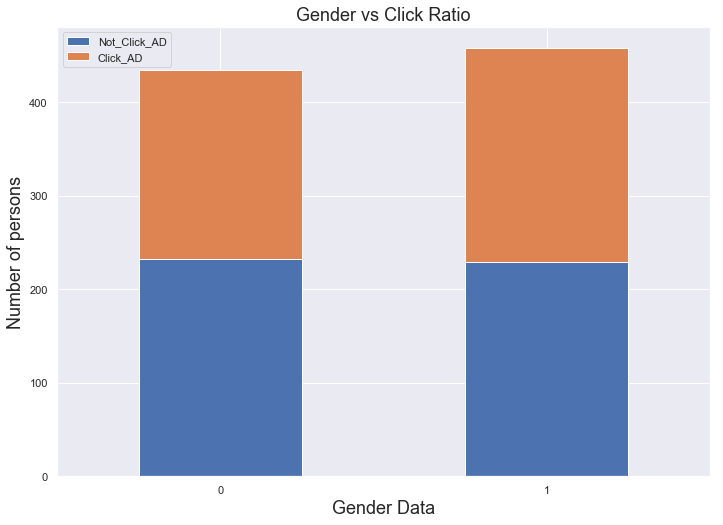

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
gender_onclick_data.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Gender Data', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title('Gender vs Click Ratio', fontdict=font)
plt.savefig('Gender-vs-Click-Ratio.png')

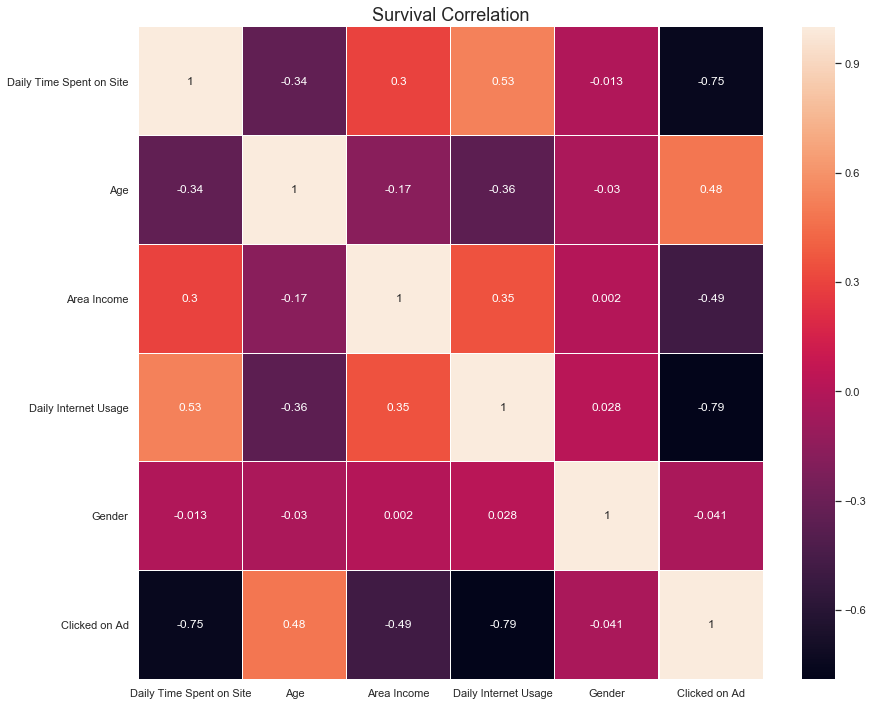

In [34]:
plt.figure(figsize=(14,12))
plt.title('Survival Correlation', fontdict=font)
sns.heatmap(advert.corr(), linewidths=0.1, linecolor='white', annot=True)
plt.savefig('Advert-Columns-Correlation.png')

In [35]:
advert.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [37]:
training_data=advert[['Gender','Age','Daily Internet Usage','Daily Time Spent on Site',]]

In [38]:
training_data.head()

,Gender,Age,Daily Internet Usage,Daily Time Spent on Site
0,0,35,256.09,68.95
1,1,31,193.77,80.23
2,0,26,236.50,69.47
3,1,29,245.89,74.15
4,0,35,225.58,68.37


In [39]:
training_data.isnull().sum()

Gender                      0
Age                         0
Daily Internet Usage        0
Daily Time Spent on Site    0
dtype: int64

In [40]:
output_data = advert['Clicked on Ad']

In [41]:
output_data.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Clicked on Ad, dtype: int64

In [42]:
training_data.shape[0]

900

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.4, random_state=42)

In [45]:
y_test.head()

70     1
827    1
231    1
588    0
39     1
Name: Clicked on Ad, dtype: int64

In [46]:
logistic_model.fit(X, Y)

C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
logistic_model.coef_

array([[ 0.04863105,  0.16940792, -0.03384029, -0.07977726]])

In [48]:
details = pd.DataFrame(logistic_model.coef_.T, index=training_data.columns, columns=['Values'])

In [49]:
details

,Values
Gender,0.048631
Age,0.169408
Daily Internet Usage,-0.033840
Daily Time Spent on Site,-0.079777


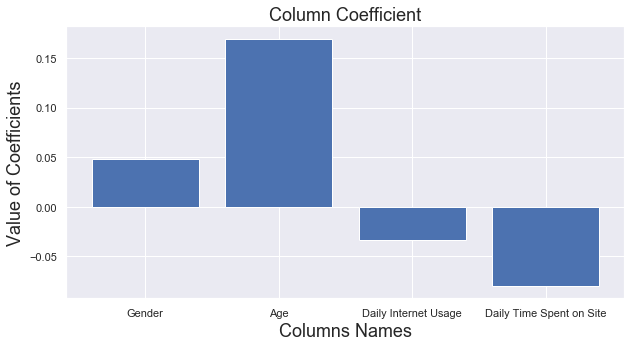

In [50]:
plt.figure(figsize=(10, 5))
plt.xlabel('Columns Names', fontdict=font)
plt.ylabel('Value of Coefficients', fontdict=font)
plt.title('Column Coefficient', fontdict=font)
plt.bar(x=details.index, height=details['Values'])
plt.savefig('Column-vs-Coefficients.png')

In [51]:
single_prediction = logistic_model.predict([[1, 55, 230, 70]])

In [52]:
single_prediction

array([1], dtype=int64)

In [53]:
training_prediction=logistic_model.predict(x_test)

In [54]:
training_prediction[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
training_accuracy=accuracy_score(training_prediction,y_test)

In [57]:
training_accuracy

0.9388888888888889

In [58]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,11/02/2016 17:02
1,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,22/07/2016 7:44
2,45.62,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,26/06/2016 2:34
3,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,14/05/2016 23:08
4,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,24/05/2016 10:04


In [59]:
test_data.rename(columns={'Male':'Gender'}, inplace=True)

In [60]:
test_data=test_data[['Gender','Age','Daily Internet Usage','Daily Time Spent on Site',]]
test_data.head()

,Gender,Age,Daily Internet Usage,Daily Time Spent on Site
0,0,51,122.04,50.78
1,0,38,203.90,40.47
2,0,43,121.28,45.62
3,0,30,178.69,84.76
4,0,26,221.59,80.64


In [61]:
from sklearn.preprocessing import Imputer

In [62]:
test_data_imputed = test_data

In [63]:
imputer = Imputer(strategy='most_frequent')

C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
imputer.fit(test_data_imputed)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [65]:
imputer.statistics_

array([  0.  ,  31.  , 105.04,  32.6 ])

In [66]:
test_data_predicion = imputer.transform(test_data_imputed)

In [67]:
test_data_predicion


array([[  0.  ,  51.  , 122.04,  50.78],
       [  0.  ,  38.  , 203.9 ,  40.47],
       [  0.  ,  43.  , 121.28,  45.62],
       [  0.  ,  30.  , 178.69,  84.76],
       [  0.  ,  26.  , 221.59,  80.64],
       [  1.  ,  27.  , 236.96,  75.94],
       [  0.  ,  50.  , 216.01,  37.01],
       [  0.  ,  31.  , 193.6 ,  87.18],
       [  0.  ,  50.  , 146.44,  56.91],
       [  0.  ,  24.  , 226.49,  75.24],
       [  1.  ,  52.  , 182.2 ,  42.84],
       [  0.  ,  47.  , 109.98,  67.56],
       [  1.  ,  42.  , 160.49,  34.96],
       [  1.  ,  37.  , 211.56,  87.46],
       [  1.  ,  39.  , 128.62,  41.86],
       [  1.  ,  34.  , 174.88,  34.04],
       [  1.  ,  42.  , 113.75,  54.96],
       [  1.  ,  31.  , 199.4 ,  87.14],
       [  1.  ,  32.  , 215.29,  78.79],
       [  1.  ,  25.  , 181.25,  65.56],
       [  0.  ,  34.  , 245.5 ,  81.05],
       [  1.  ,  37.  , 112.52,  55.71],
       [  1.  ,  49.  , 129.16,  45.48],
       [  0.  ,  56.  , 149.53,  47.  ],
       [  1.  , 

In [68]:
test_data_imputed = pd.DataFrame(test_data_predicion, columns=test_data.columns)

In [69]:
test_data_imputed.head()

,Gender,Age,Daily Internet Usage,Daily Time Spent on Site
0,0.0,51.0,122.04,50.78
1,0.0,38.0,203.90,40.47
2,0.0,43.0,121.28,45.62
3,0.0,30.0,178.69,84.76
4,0.0,26.0,221.59,80.64


In [70]:
test_prediction = logistic_model.predict(test_data_imputed)

In [71]:
test_prediction[:5]

array([1, 1, 1, 0, 0], dtype=int64)